In [165]:
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex
from matplotlib.patches import Patch
import string as st
import seaborn as sns



In [166]:

pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',60)

csv_path = "data/GamingStudy_data.csv"
data = pd.read_csv(csv_path, encoding='latin1')



In [167]:
display(data.head())
print(f"This dataset has {data.shape[0]} data samples and {data.shape[1]} features.")
duplicate_samples = data.duplicated().sum()
print(f"\nNumber of duplicate samples: {duplicate_samples}")

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,SWL3,SWL4,SWL5,Game,Platform,Hours,earnings,whyplay,League,highestleague,streams,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Gender,Age,Work,Degree,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,3,5,5,5,5,Skyrim,"Console (PS, Xbox, ...)",15.0,I play for fun,having fun,NaN,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,Male,25,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,3,5,2,5,1,Other,PC,8.0,I play for fun,having fun,NaN,NaN,2.0,2.0,1.0,1.0,3.0,2.0,3.0,1.0,3.0,4.0,0.0,3.0,0.0,1.0,3.0,3.0,1.0,2.0,1.0,Male,41,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,2,6,5,2,2,Other,PC,0.0,I play for fun,having fun,NaN,NaN,0.0,1.0,0.0,1.0,2.0,3.0,4.0,2.0,1.0,0.0,1.0,1.0,3.0,0.0,2.0,4.0,4.0,2.0,4.0,Female,32,Employed,Bachelor (or equivalent),Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,2,5,5,3,2,Other,PC,20.0,I play for fun,improving,NaN,NaN,5.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,Male,28,Employed,Bachelor (or equivalent),USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,5,42052.08948,2,1,2,2,2,3,2,Very difficult,2,2,4,5,1,Other,"Console (PS, Xbox, ...)",20.0,I play for fun,having fun,NaN,NaN,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,Male,19,Employed,High school diploma (or equivalent),USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


This dataset has 13464 data samples and 55 features.

Number of duplicate samples: 0


In [168]:
import pandas as pd

# Define the column types based on your description
column_types = {
    "S. No.": "Nominal Categorical",
    "Timestamp": "Continuous Numerical",
    **{f"GAD{i}": "Ordinal Categorical" for i in range(1, 8)},
    **{f"SWL{i}": "Ordinal Categorical" for i in range(1, 6)},
    **{f"SPIN{i}": "Ordinal Categorical" for i in range(1, 18)},
    "GADE": "Ordinal Categorical",
    "Game": "Nominal Categorical",
    "Platform": "Nominal Categorical",
    "Hours": "Continuous Numerical",
    "Earnings": "Text",
    "whyplay": "Text",
    "Narcissism": "Ordinal Categorical",
    "Gender": "Nominal Categorical",
    "Age": "Discrete Numerical",
    "Work": "Nominal Categorical",
    "Degree": "Nominal Categorical",
    "Birthplace": "Nominal Categorical",
    "Residence": "Nominal Categorical",
    "Birthplace_ISO3": "Nominal Categorical",
    "Residence_ISO3": "Nominal Categorical",
    "Reference": "Nominal Categorical",
    "Playstyle": "Text",
    "accept": "Nominal Categorical",
    "GAD_T": "Discrete Numerical",
    "SWL_T": "Discrete Numerical",
    "SPIN_T": "Discrete Numerical",
    "streams": "Discrete Numerical",
    "League": "Text",
    "earnings": "Text",
}

# Assign variable type to all columns
data_types = pd.Series({col: column_types.get(col, "Unknown") for col in data.columns}, name="Variable Type")

# Calculate missing values and their percentage
total_rows = len(data)
missing_summary = pd.DataFrame({
    'Missing Values': data.isna().sum(),
    'Percentage': (data.isna().sum() / total_rows) * 100,
    'Variable Type': data_types
}).sort_values(by='Missing Values', ascending=False)

# Display the summary
display(missing_summary)
display(data.info())

,Missing Values,Percentage,Variable Type
highestleague,13464,100.000000,Unknown
League,1852,13.755199,Text
Degree,1577,11.712715,Nominal Categorical
SPIN_T,650,4.827689,Discrete Numerical
GADE,649,4.820261,Ordinal Categorical
accept,414,3.074866,Nominal Categorical
SPIN13,187,1.388889,Ordinal Categorical
SPIN11,187,1.388889,Ordinal Categorical
SPIN17,175,1.299762,Ordinal Categorical
SPIN12,168,1.247772,Ordinal Categorical


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S. No.           13464 non-null  int64  
 1   Timestamp        13464 non-null  float64
 2   GAD1             13464 non-null  int64  
 3   GAD2             13464 non-null  int64  
 4   GAD3             13464 non-null  int64  
 5   GAD4             13464 non-null  int64  
 6   GAD5             13464 non-null  int64  
 7   GAD6             13464 non-null  int64  
 8   GAD7             13464 non-null  int64  
 9   GADE             12815 non-null  object 
 10  SWL1             13464 non-null  int64  
 11  SWL2             13464 non-null  int64  
 12  SWL3             13464 non-null  int64  
 13  SWL4             13464 non-null  int64  
 14  SWL5             13464 non-null  int64  
 15  Game             13464 non-null  object 
 16  Platform         13464 non-null  object 
 17  Hours       

None

Each of the variables above has been marked as categorical, numerical, or text data. One thing to note from the table above is that most of the variables do not have any missing values in any of the rows. The highest league variable has absolutely no entries, which means that it will not be considered in any of the future calculations or models for this dataset.

C:\Users\hazem\AppData\Local\Temp\ipykernel_118812\3025479614.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout
C:\Users\hazem\AppData\Local\Temp\ipykernel_118812\3025479614.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 4))  # Set the size for each plot


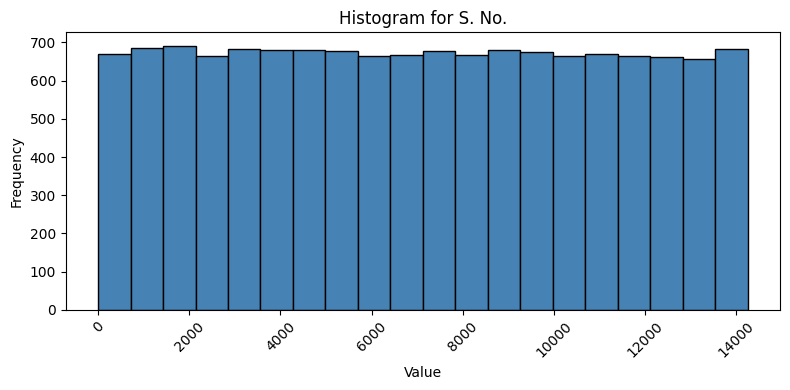

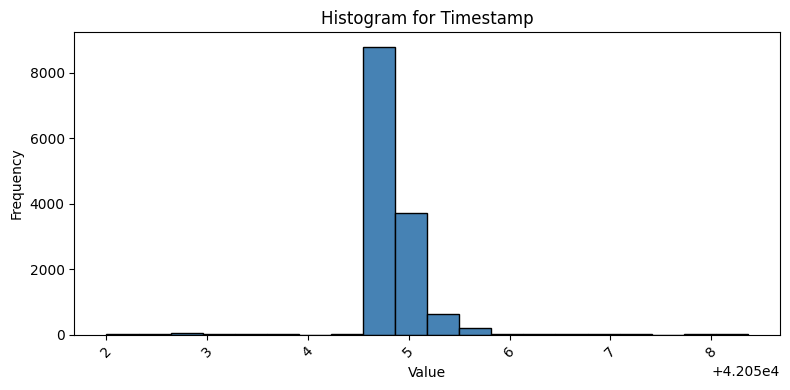

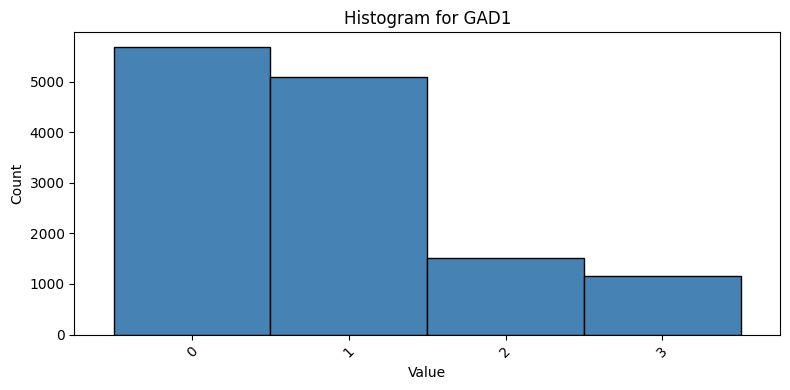

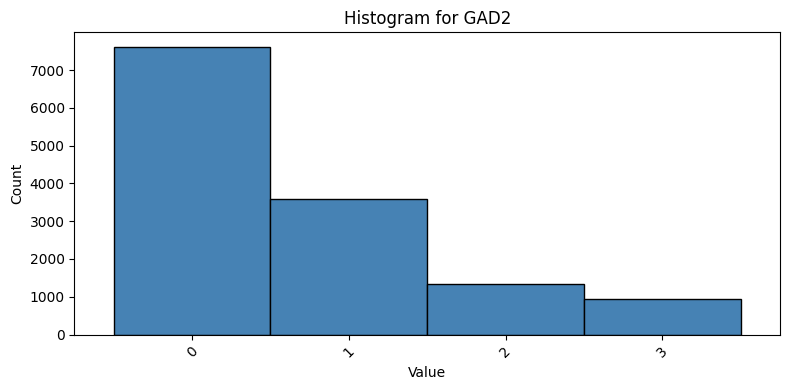

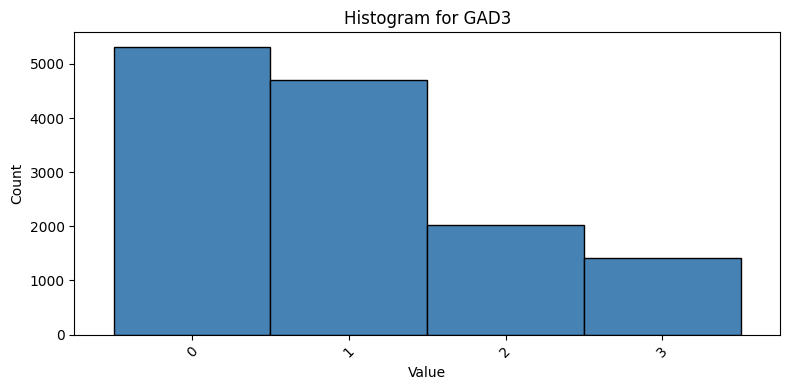

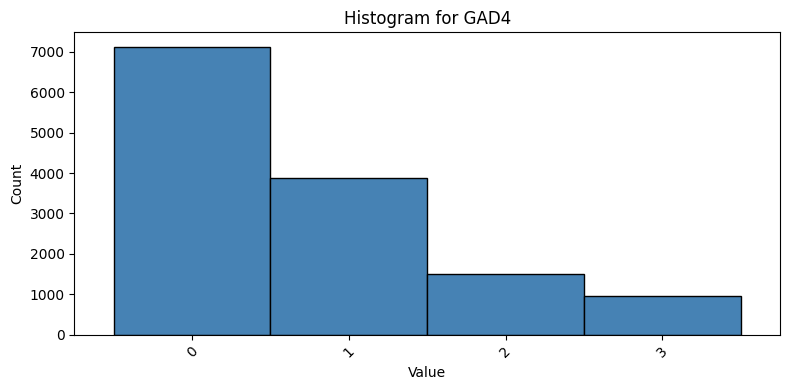

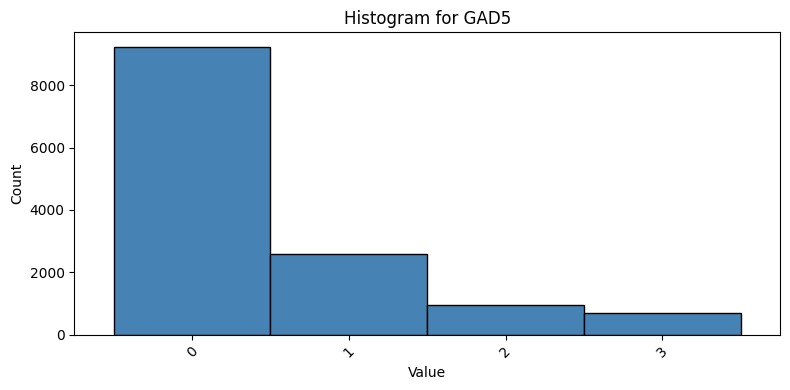

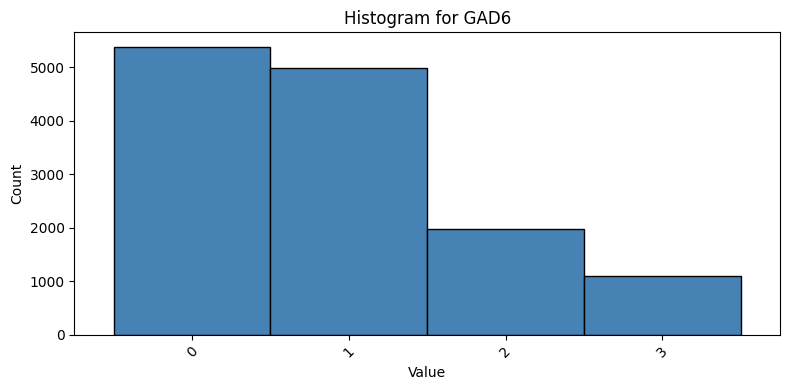

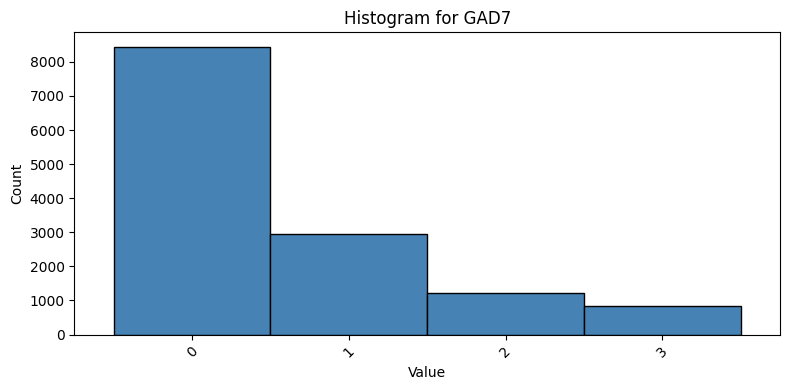

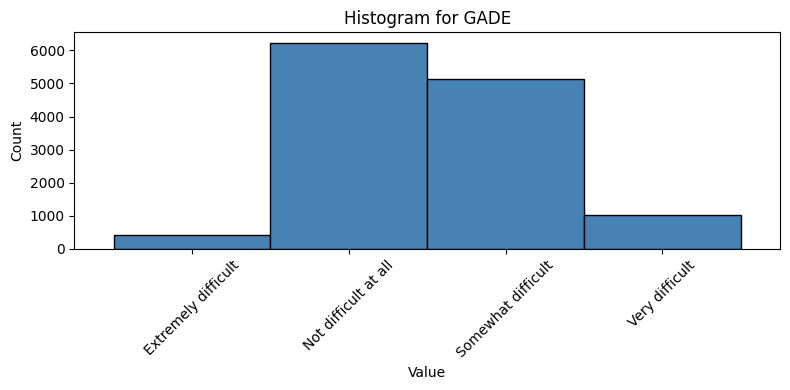

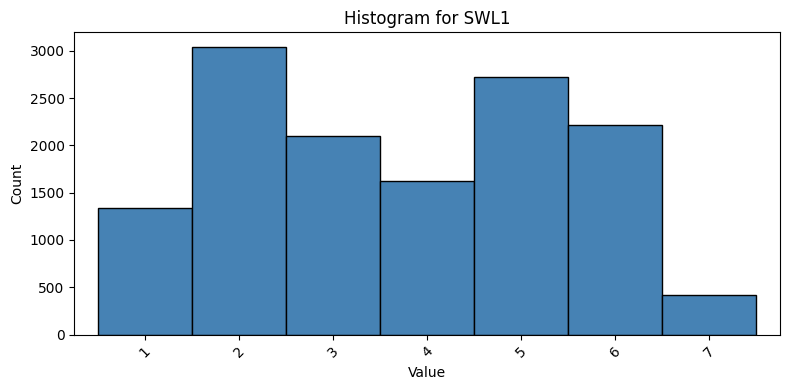

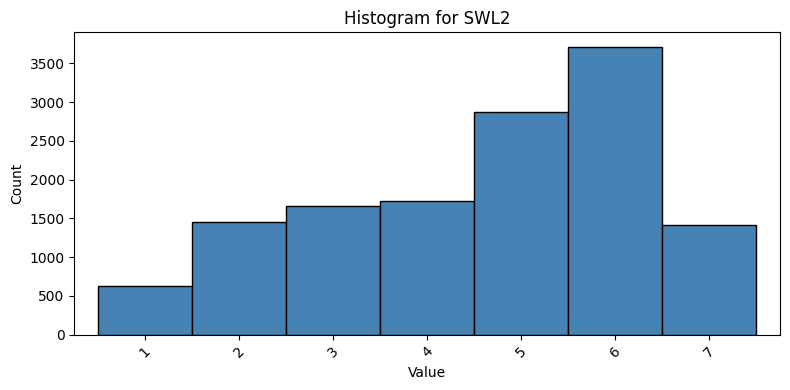

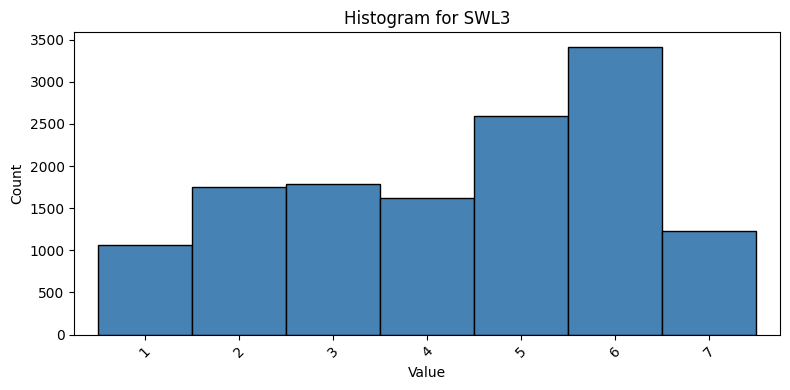

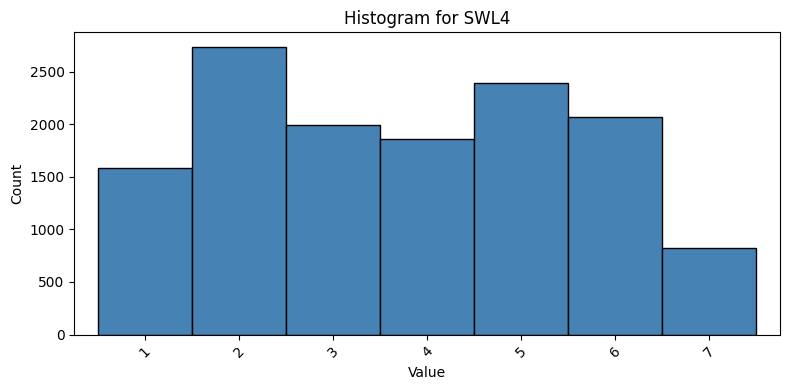

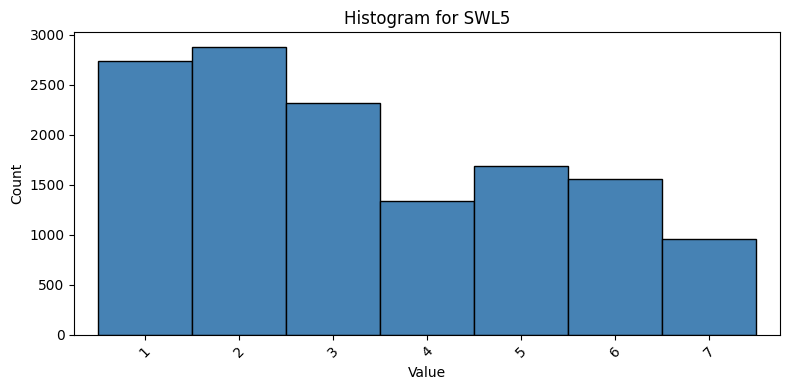

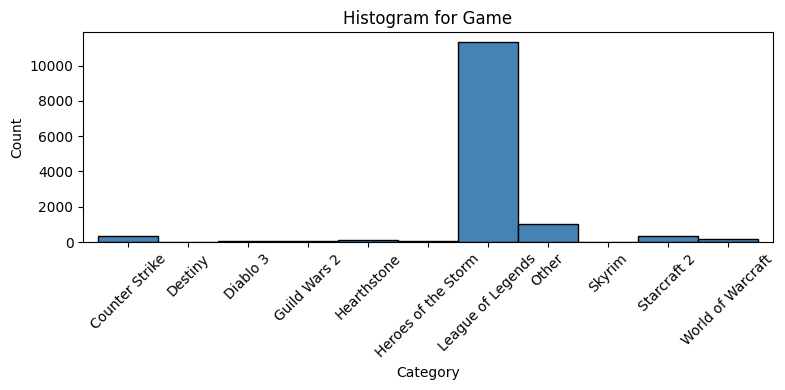

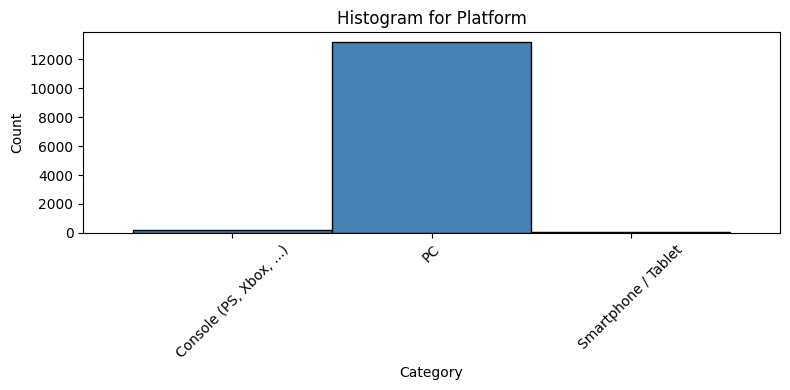

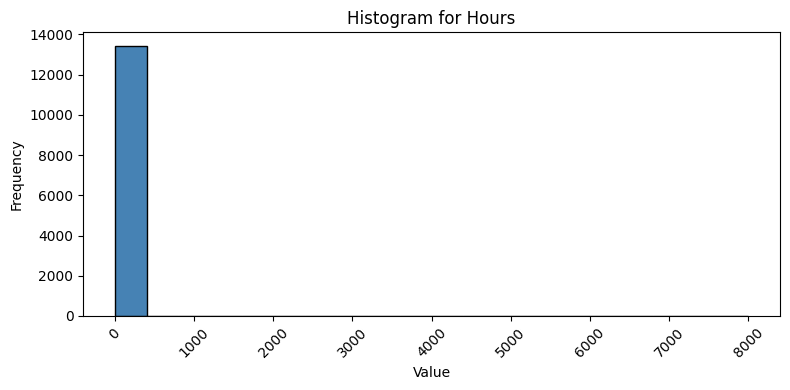

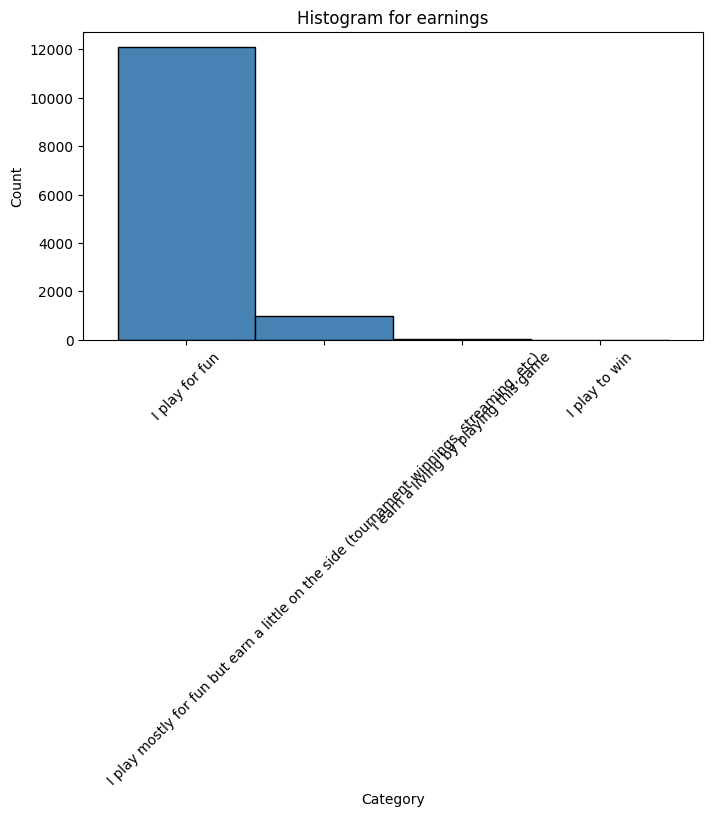

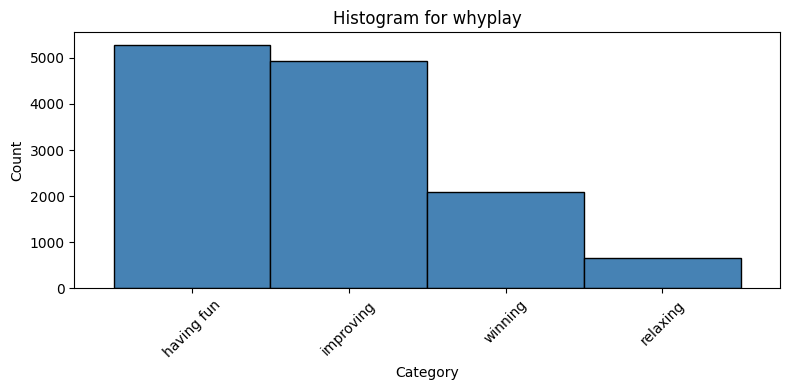

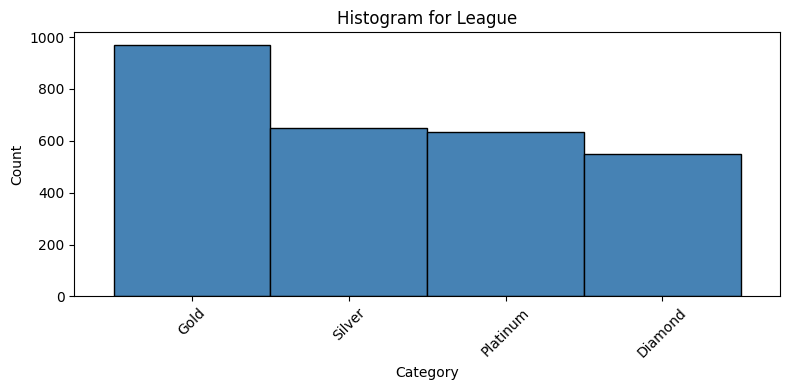

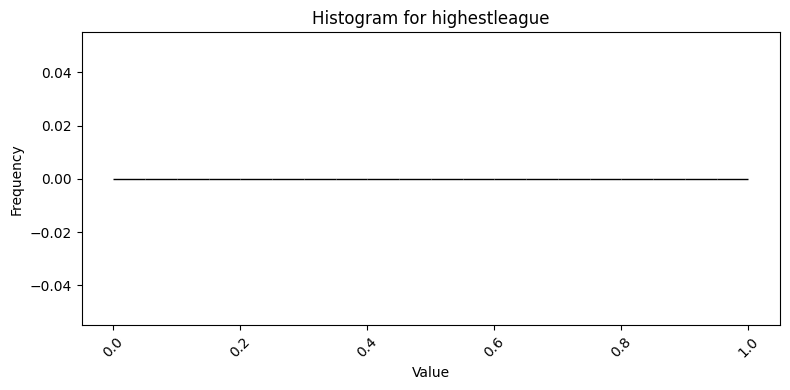

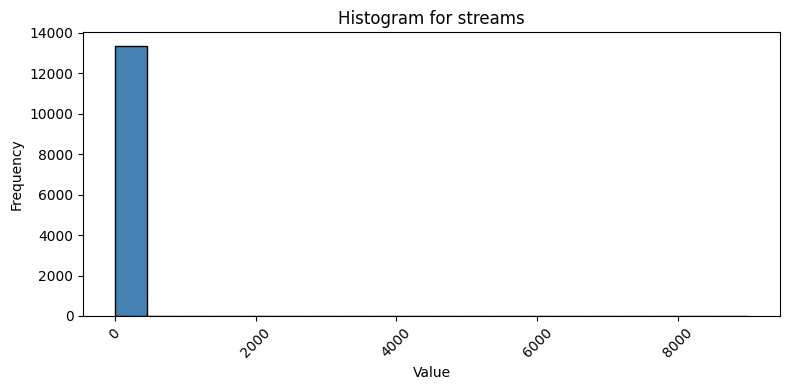

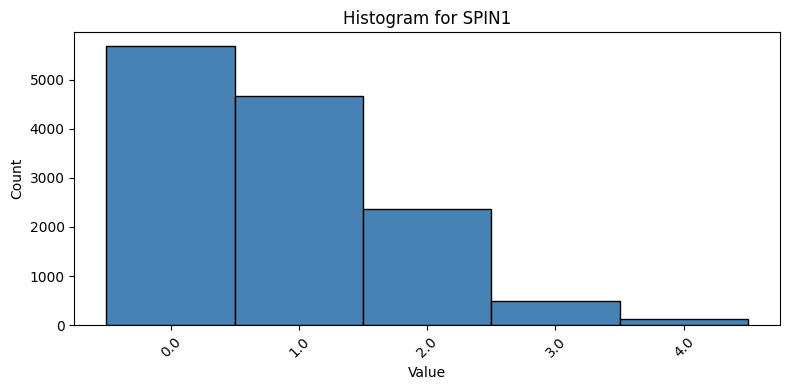

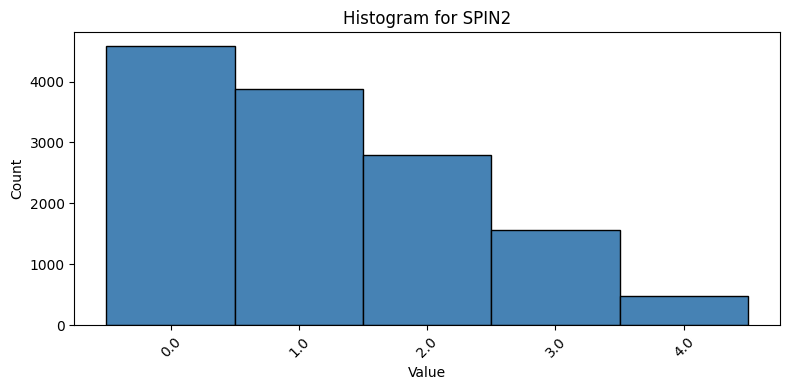

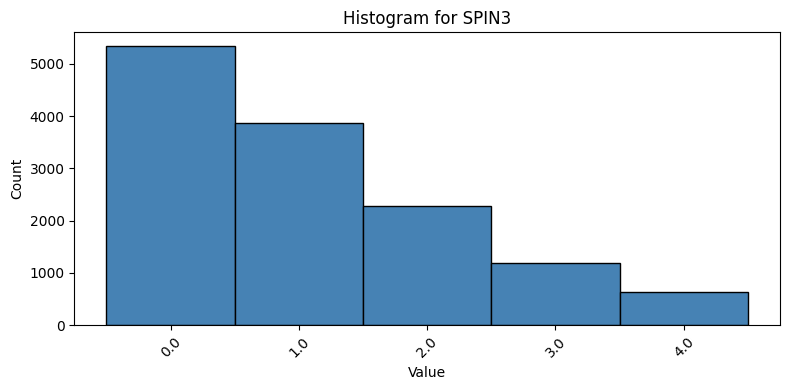

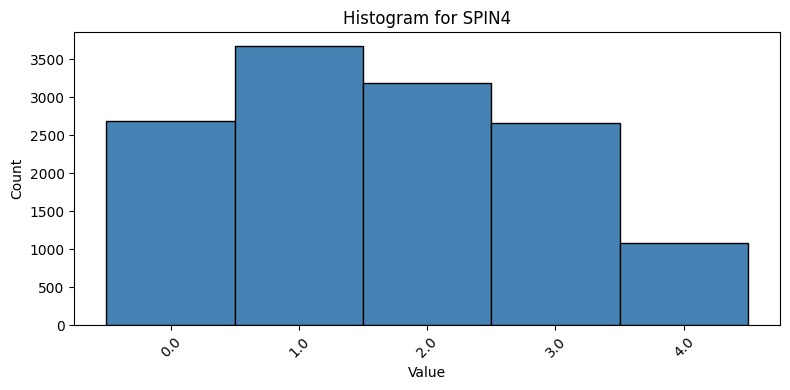

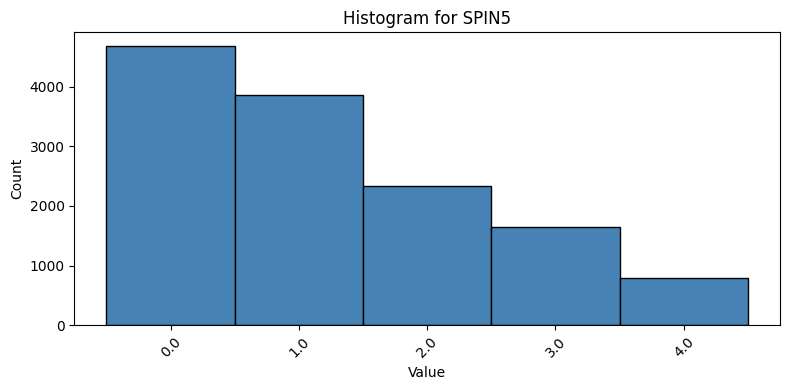

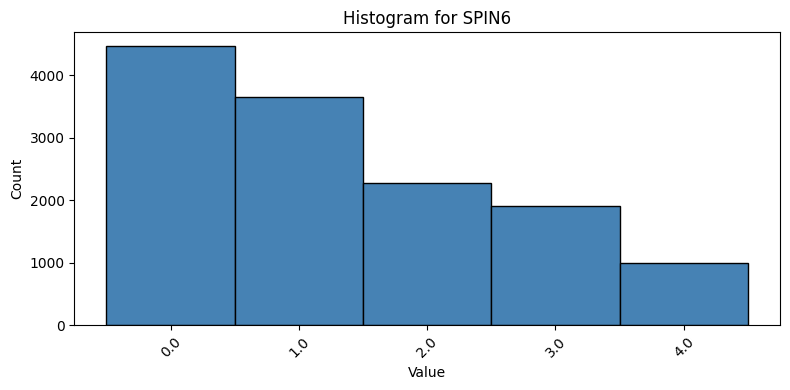

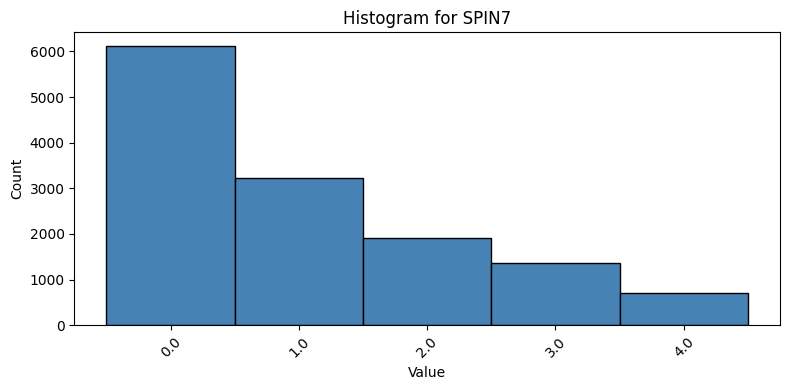

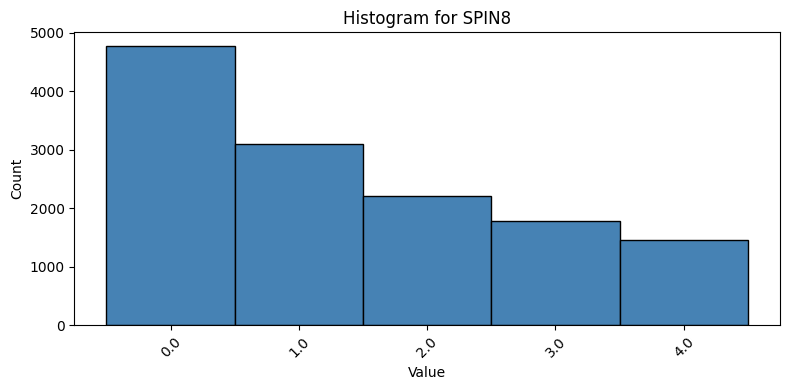

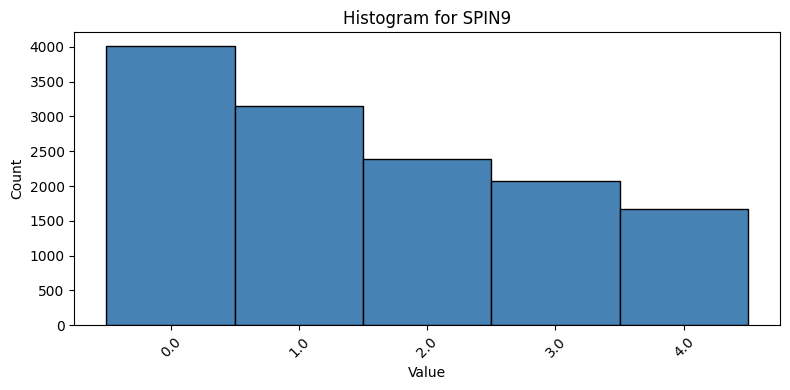

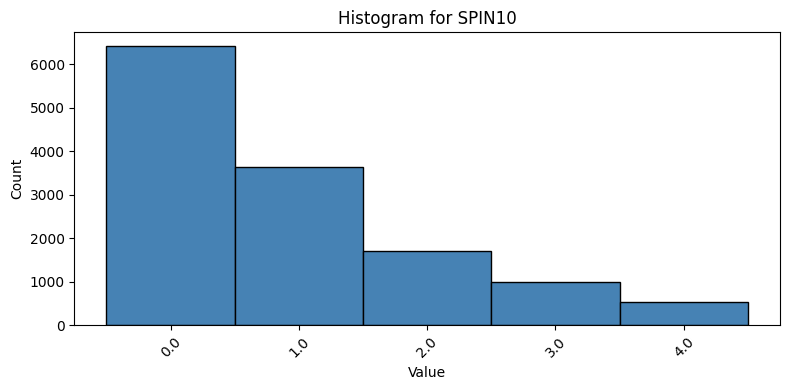

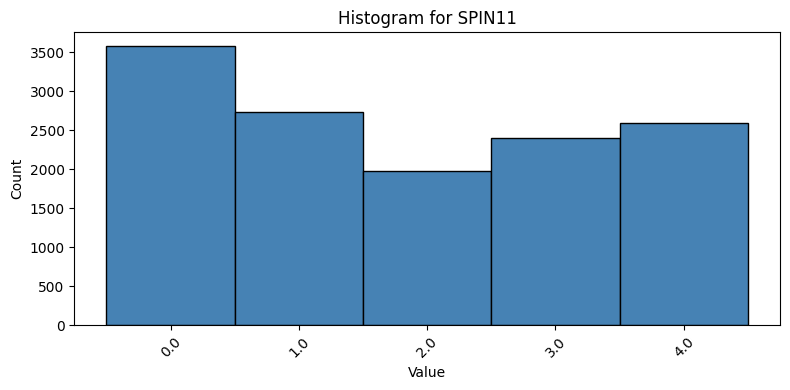

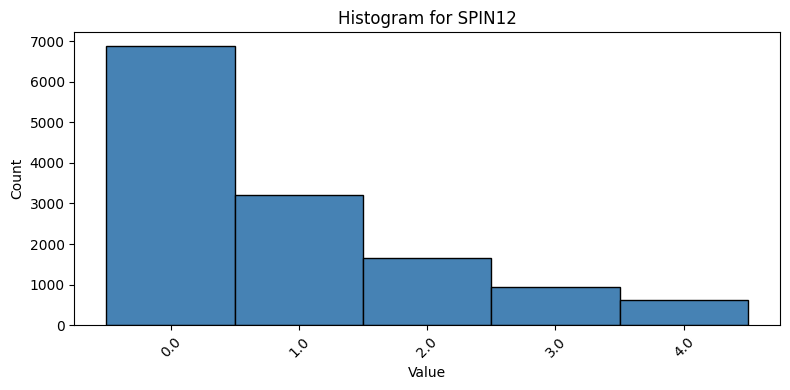

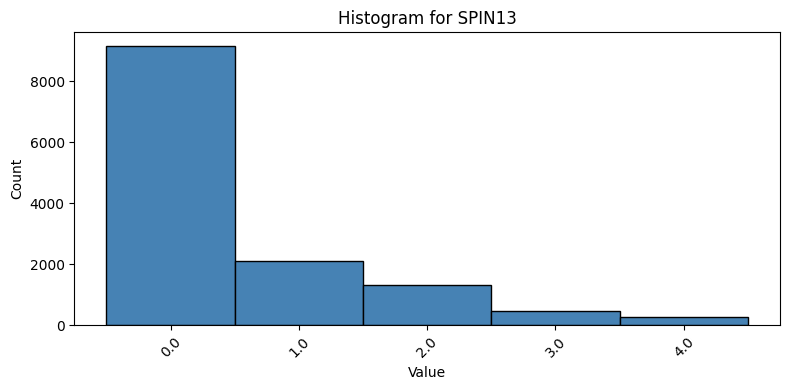

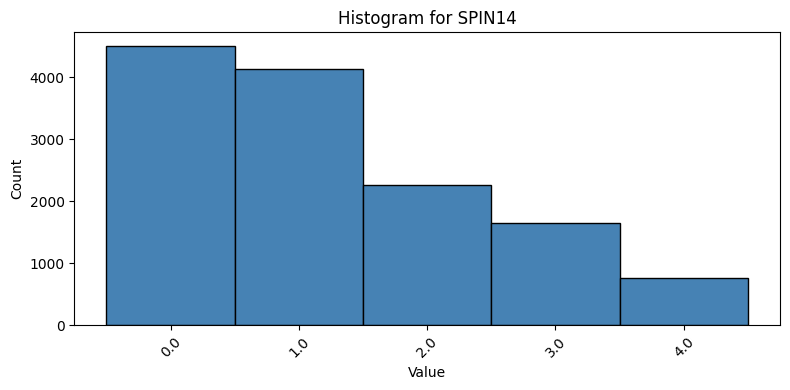

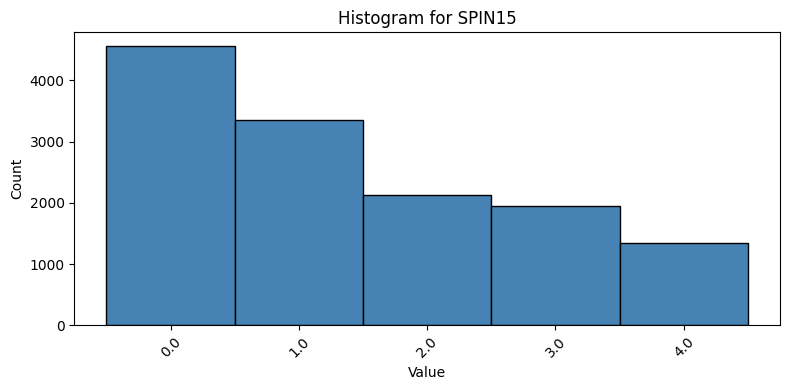

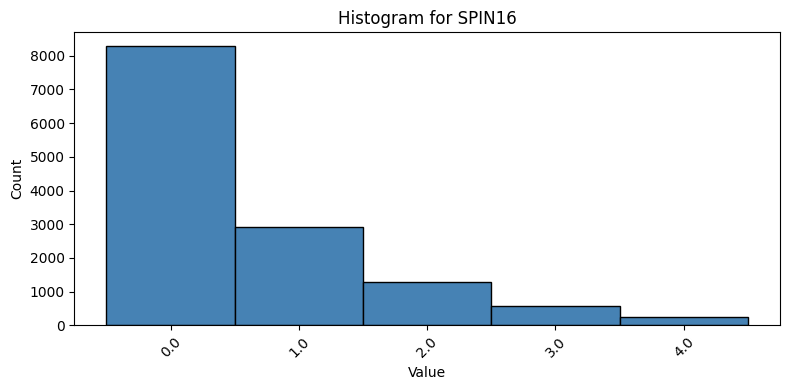

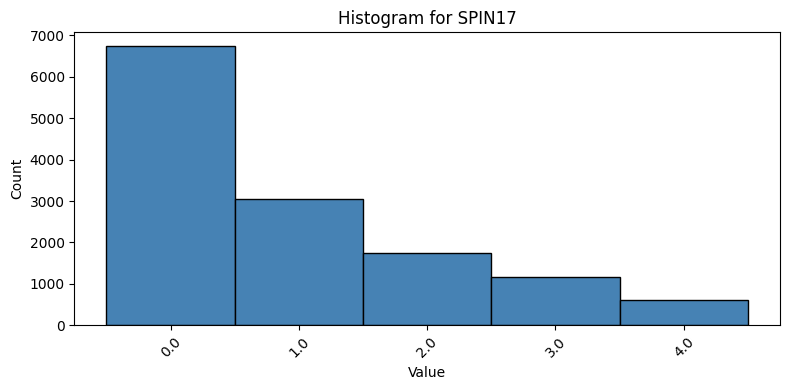

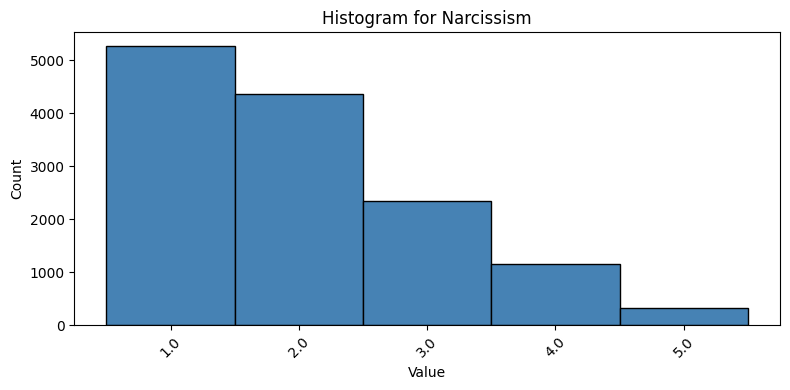

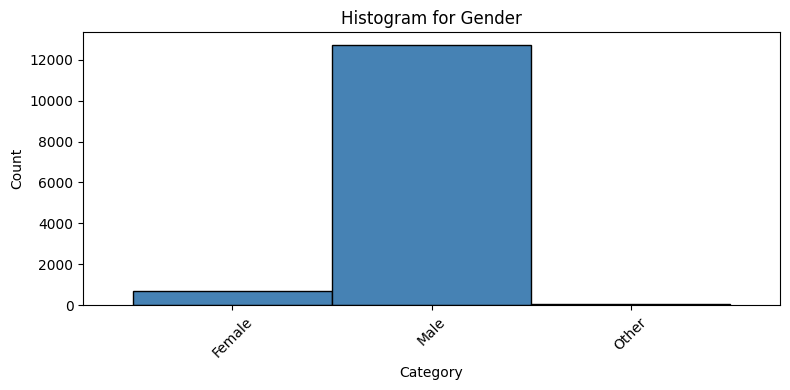

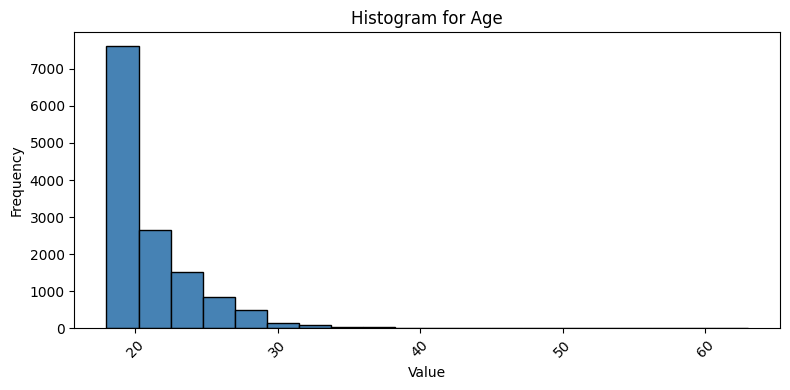

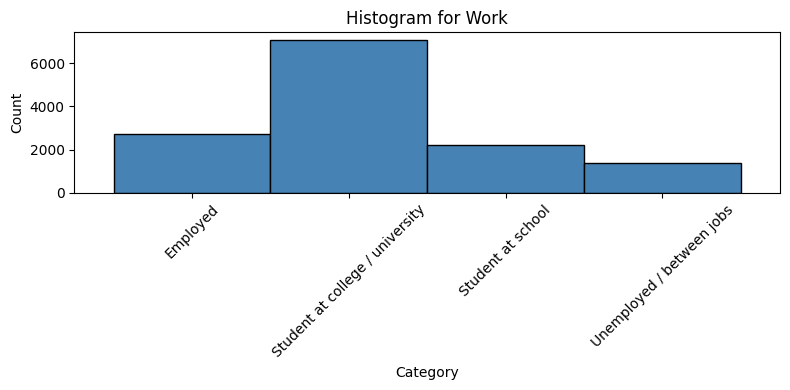

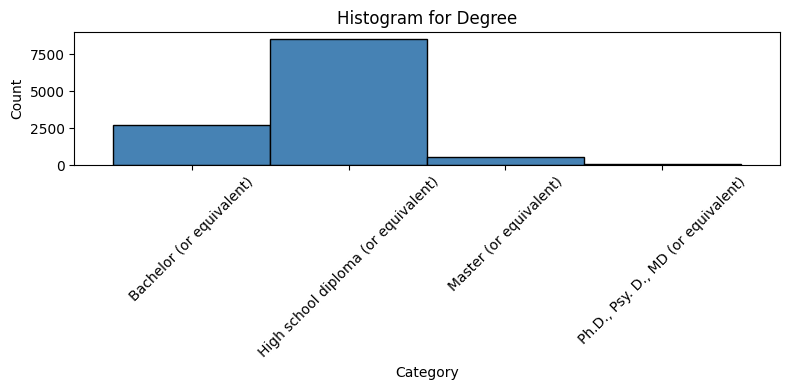

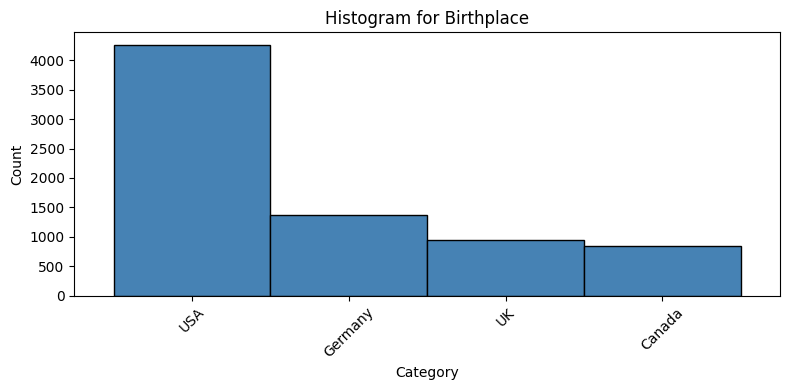

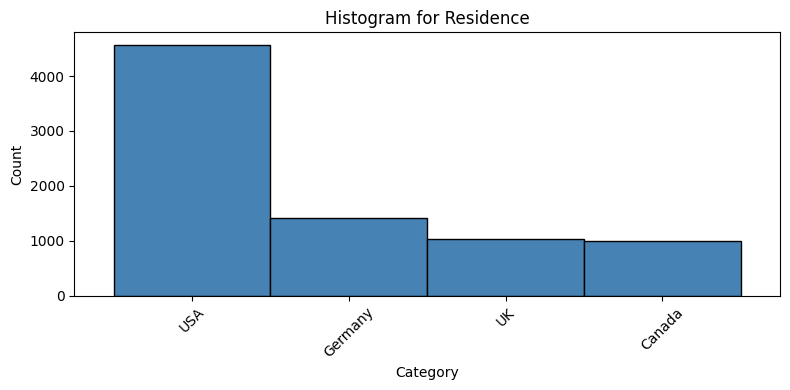

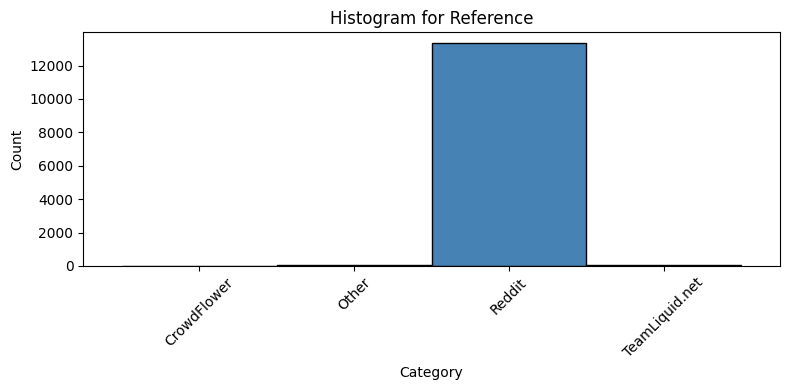

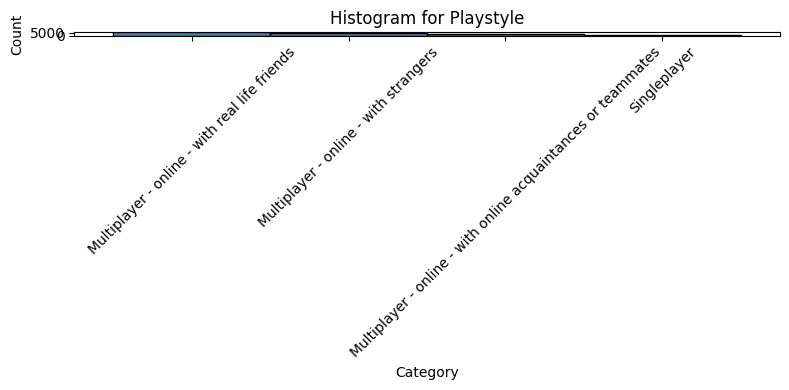

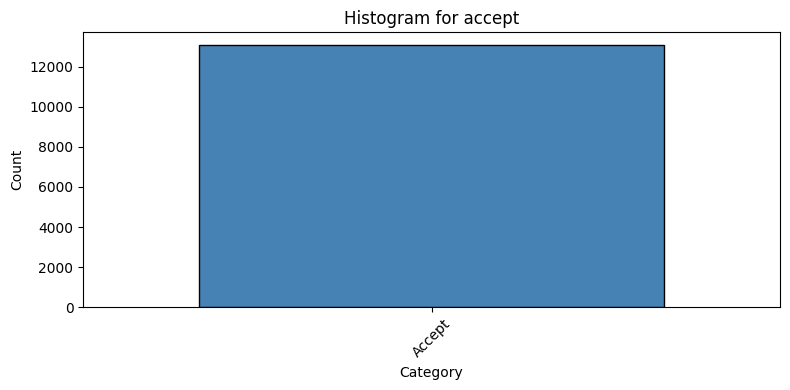

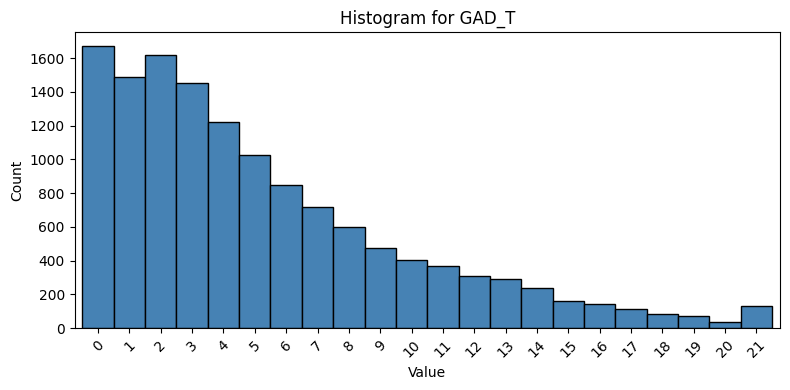

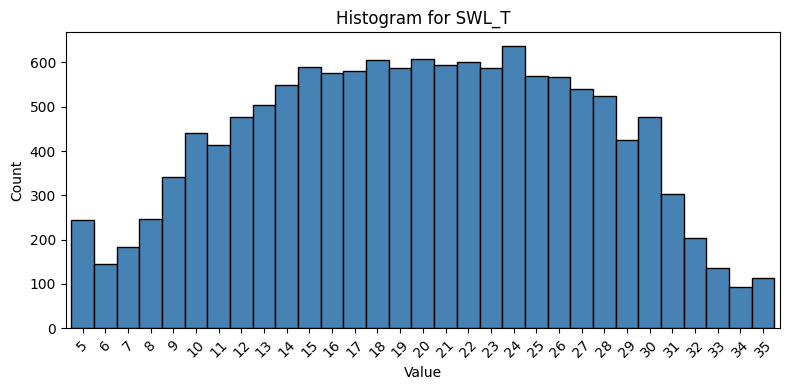

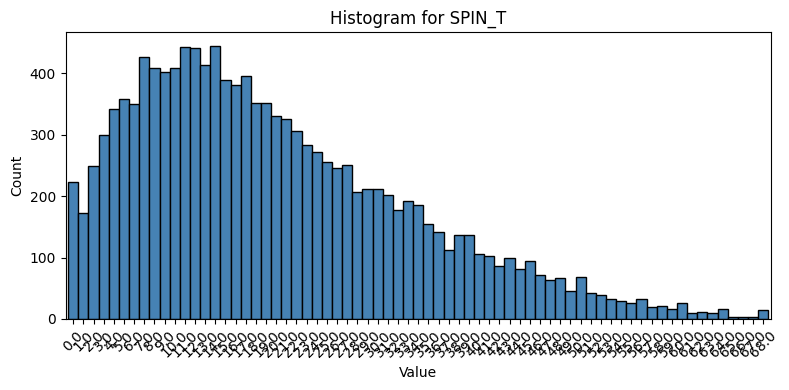

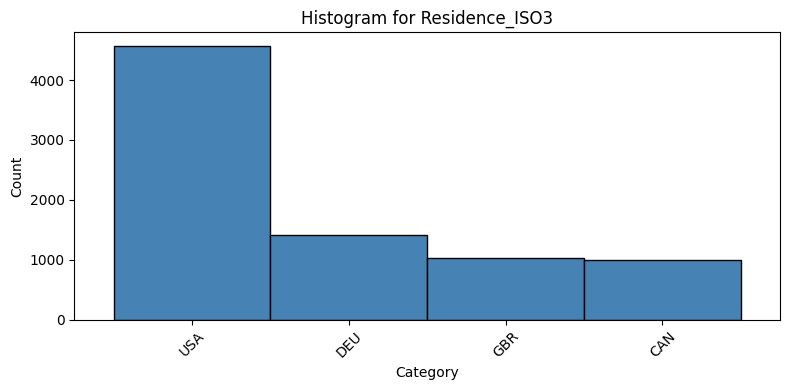

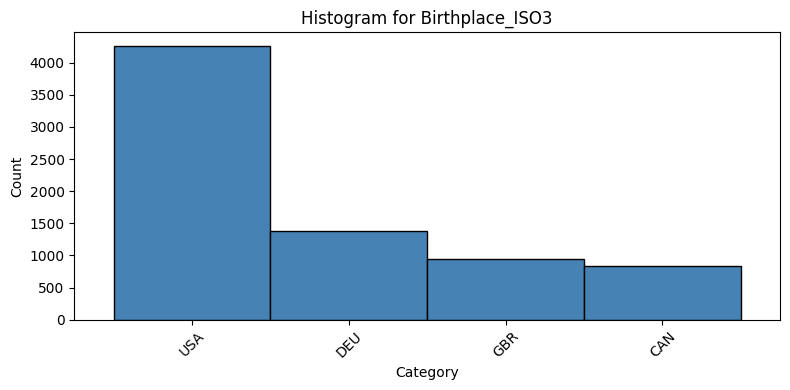

In [169]:
import matplotlib.pyplot as plt

for column in data.columns:
    unique_values = data[column].nunique()  # Count unique values

    plt.figure(figsize=(8, 4))  # Set the size for each plot

    # Check if the column name contains 'GAD', 'SPIN', 'SWL', or 'Narcissism'
    if any(keyword in column for keyword in ['GAD', 'SPIN', 'SWL', 'Narcissism']):
        # Treat as discrete whole values
        if unique_values > 80:  # If more than 80 unique values, plot top 40
            top_40 = data[column].value_counts().head(4)
            top_40.plot(kind='bar', color='steelblue', edgecolor='black', width=1.0)
        else:
            data[column].value_counts().sort_index().plot(kind='bar', color='steelblue', edgecolor='black', width=1.0)
        
        plt.xlabel('Value')
        plt.ylabel('Count')
        
    elif data[column].dtype in ['int64', 'float64']:  # Numerical features
        # Use plt.hist for numerical data
        plt.hist(data[column].dropna(), bins=20, color='steelblue', edgecolor='black')
        plt.xlabel('Value')
        plt.ylabel('Frequency')

    else:  # Other categorical features
        if unique_values > 80:  # If more than 80 unique values, plot top 40
            top_40 = data[column].value_counts().head(4)
            top_40.plot(kind='bar', color='steelblue', edgecolor='black', width=1.0)
        else:
            data[column].value_counts().sort_index().plot(kind='bar', color='steelblue', edgecolor='black', width=1.0)

        plt.xlabel('Category')
        plt.ylabel('Count')

    plt.title(f'Histogram for {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust layout
    # plt.show()  # Display the plot


The above dataset has many interesting features that can be noticed at a glance. First, let us dive into what the dataset contains and the significance of each point:

**S. No.**: This is the subject number column, containing all of the subject numbers in the dataset. This is a nominal categorical variable, as the value has no true meaning in the dataset.

**Timestamp**: This is the timestamp at which the online gaming anxiety data was collected. This is a continuous numerical variable.

**Survey Questions GAD1 to GAD7**: These represent specific questions related to generalized anxiety. Each response is on a scale from 1 to 3, 1 being the statement never happened within the last 2 weeks and 3 being the statement happened every day within the last 2 weeks. This is an ordinal categorical variable. The following are the questions that the participant answers, in order of GAD1 to GAD7:
- Feeling nervous, anxious, or on edge?
- Not being able to stop or control worrying?
- Worrying too much about different things?
- Having trouble relaxing?
- Being so restless that it’s hard to sit still?
- Becoming easily annoyed or irritable?
- Feeling afraid as if something awful might happen?
All of the graphs relating to the GAD responses tend to be right skewed, meaning that most of the responses are on the lower end of the spectrum.


**Survey Questions SWL1 to SWL5**: These represent specific questions related to satisfaction with life. Each response is on a scale from 1 to 5, 1 being strongly disagree with the statement and 7 being strongly agree with the statement. This is an ordinal categorical variable. The following are the statements in the questionnaire:
- In most ways, my life is close to my ideal.
- I am bothered by blushing in front of people
- Parties and social events scare me
- I avoid talking to people I don't know
- Being criticized scares me a lot
- Fear of embarrassment causes me to avoid doing things or speaking to people
- Sweating in front of people causes me distress
- I avoid going to parties
- I avoid activities in which I am the centre of attention
- Talking to strangers scares me
- I avoid having to give speeches
- I would do anything to avoid being criticized
- Heart palpitations bother me when I am around people
- I am afraid of doing things when people might be watching
- Being embarrassed or looking stupid is among my worst fears
- I avoid speaking to anyone in authority
- Trembling or shaking in front of others is distressing to me
All of the graphs relating to the SWL responses tend to have a balanced distribution, meaning the data is not skewed one way or another.

**Survey Questions SPIN1 to SPIN17**: These represent specific questions related to the social phobia inventory scale. Each response is on a scale from 0 to 4, 0 being the statement does not apply at all and 4 being the statement applies extremely. This is an ordinal categorical variable. The following are the statements in the questionnaire:
- I am afraid of people in authority
- The conditions of my life are excellent.
- I am satisfied with my life.
- So far, I have gotten the important things I want in life.
- If I could live my life over, I would change almost nothing.
All of the graphs relating to the SPIN responses tend to be right skewed, meaning that most of the responses are on the lower end of the spectrum.

**GADE**: This column refers to the affect of gaming in work. This is an ordinal categorical variable. The graph shows that most of the responses are geared towards "Not difficult at all" and "somewhat difficult".

**Game**: This column refers to the name of the game the subject plays. This is a categorical variable. The graph shows that a disproportionate number of participants play League of Legends rather than other games.

**Platform**: This column refers to the mode of game playing such as mobile, PC, Console, etc. This is a nominal categorical variable. The graph shows that most of the participants of the questionnaire are PC gamers.

**Hours**: This column refers to the number of hours in a week the participant devoted to playing. This is a continuous numerical variable.

**Earnings**: This column refers to if the participant earns money through gaming. As this is an open response to the participant, it is text data. The data shows that the majority of participants play for fun.

**whyplay**: This column refers to why the participant plays games. As this is also an open response to the participant, it is text data. This graph shows that participants mainly play to have fun, improve, win, or relax.

**League**: This column represents the league of the participants in the game. This is an ordinal categorical variable. The graph shows that the top 4 leagues of participants are gold, silver, platinum, diamond

**Narcissism**: This column represents the participant's interest in the game on a scale from 1 to 5, 1 being least interested and 5 being most interested. This is an ordinal categorica variable. The graph displays the data as right skewed.

**Gender**: this column represents the gender of the participant. This is a nominal categorical variable. The graph shows that most of the participants in the study identify as Male.

**Age**: This column represents the age of the participant in years. This is a discrete variable. The graph shows that most of the participants of the study are towards the younger end, with the most frequent participant being around the age of 20.

**Work**: This column represents the work status of the participant. This is a nominal categorical variable. This graph shows that most of the participants of the study are at college, though the distribution is not as disproportionate as the other graphs.

**Degree**: this column represents the highest academic degree attained by the participant. This is a nominal categorical variable. The graph shows that the majority of participants have a highest education of a high school diploma.

**Birthplace**: This column represents the birthplace country of the gamer. This is a nominal categorical variable. The graph shows that the most common country of birthplace for the participants is USA.

**Residence**: This column represents the current country of residence of the gamer. This is a nominal categorical variable. The graph shows that the most common country of residence for the participants is USA.

**Reference**: This column represents the media in which the participant received the questionnaire. This is a nominal categorical variable. The graph shows that an overwhelming majority of the participants were refered to the quiestionnaire from Reddit.

**Playstyle**: This column represents the playstyle of the participant (multiplayer, singleplayer, etc.). This is text data.

**accept**: This column represents whether the participant accepted the terms and conditions of the questionnaire. This is a nominal categorical variable.

**GAD_T**: this column represents the sum of the GAD scores for the 5 questions. This is a discrete variable

**SWL_T**: this column represents the sum of the SWL scores for the 7 questions. This is a discrete variable

**SPIN_T**: this column represents the sum of the SPIN scores for the 17 questions. This is a discrete variable

**streams**: This column represents the number of online streaming of the game. This is a discrete variable. This graph shows that the most common streams value is near 0, with the other values being almost 0 in comparison.

# PREPROCESSING

In [170]:

data.drop(columns=['highestleague', 'S. No.', 'Timestamp'], inplace=True)
data.drop(["Birthplace", "Birthplace_ISO3"], axis=1, inplace=True)
data = data.drop(data[data['accept'].isnull()].index, axis=0)
data = data.drop(['Residence', 'accept'], axis=1)

data['Work'] = data['Work'].fillna(data['Work'].mode()[0])
data['GADE'] = data['GADE'].fillna(data['GADE'].value_counts().index[1])
data['streams'] = data['streams'].fillna(int(data['streams'].mean()))
data['Hours'] = data['Hours'].fillna(int(data['Hours'].mean()))

data['League'] = data['League'].str.lower().str.strip()
data['League'] = data['League'].str.extract(r'^([a-z]+)')
data.loc[data['whyplay'] == 'having fun', 'League'] = data.loc[data['whyplay'] == 'having fun', 'League'].fillna('unranked')
data['League'] = data['League'].fillna('gold')

counts = data['League'].value_counts()
valid_leagues = ~data['League'].isin(counts[counts < 3].index)
data.loc[~valid_leagues, 'League'] = np.nan

data['League'] = data['League'].replace(
    ['i', 'currently', 'high', 'season', 'lol', 'cs', 'last', 'csgo', 'starcraft', 'geater', 'in', 'rank', 'still'],
    np.nan
)
data['League'] = data['League'].fillna('unspecified')

cols = ['SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 
        'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17', 'SPIN_T']
for col in cols:
    data[col] = data[col].fillna(data[col].mode()[0])


for col in ['Playstyle', 'earnings', 'whyplay']:
    data[col] = data[col].apply(lambda x: ' '.join(word.strip(st.punctuation) for word in x.split()))
    data[col] = data[col].str.lower().str.strip()

data['earnings'] = data['earnings'].replace(data['earnings'].value_counts().index[3:], 'Other')
data['whyplay'] = data['whyplay'].replace(data['whyplay'].value_counts().index[5:], 'Other')
data['Playstyle'] = data['Playstyle'].replace(data['Playstyle'].value_counts().index[5:], 'Other')

data['Playstyle'] = data['Playstyle'].replace('Other', np.nan)
data['whyplay'] = data['whyplay'].replace('Other', np.nan)
data['earnings'] = data['earnings'].replace('Other', np.nan)
data['Platform'] = data['Platform'].replace('Console (PS, Xbox, ...)', 'Console')

data = data.dropna(subset=['GAD_T'])



The code above aims to clean up the dataset from any null values or columns that could perhaps cause bias in the study. The columns that were dropped include highestleague, S. No., Timestamp, variables related to birthplace and current place of residence, and those who did not accept to participate in the study. Dropping these columns allows for the removal of certain local biases in the data as well as respects the consent of the participants in the study.

Next, the code handles missing data in several columns. For the 'Work' column, missing values are replaced with the most frequent value (mode), which ensures that the dataset remains complete without introducing arbitrary or biased assumptions. Similarly, missing values in the 'GADE' column are filled with the second most common value to reflect the most likely category. The 'streams' and 'Hours' columns, which are numerical, have missing values replaced with their respective column mean, converted to integers. This ensures numerical consistency and prevents missing data from skewing any analysis that requires these variables.

Additionally, the code cleans up the 'League' column, which holds information about a player's ranking, by standardizing the text entries. It converts all values to lowercase and strips any surrounding whitespace to ensure uniformity. For missing values in the 'League' column, the code fills in defaults such as 'gold' or 'unranked', based on specific conditions. The 'League' column is also further cleaned by eliminating values that appear less than three times, ensuring that only valid and relevant league categories remain in the data. The same approach is applied to the 'Playstyle', 'earnings', 'whyplay', and 'Platform' columns to replace rare values with a category labeled as 'Other', and to further clean up any outliers or inconsistent entries. 

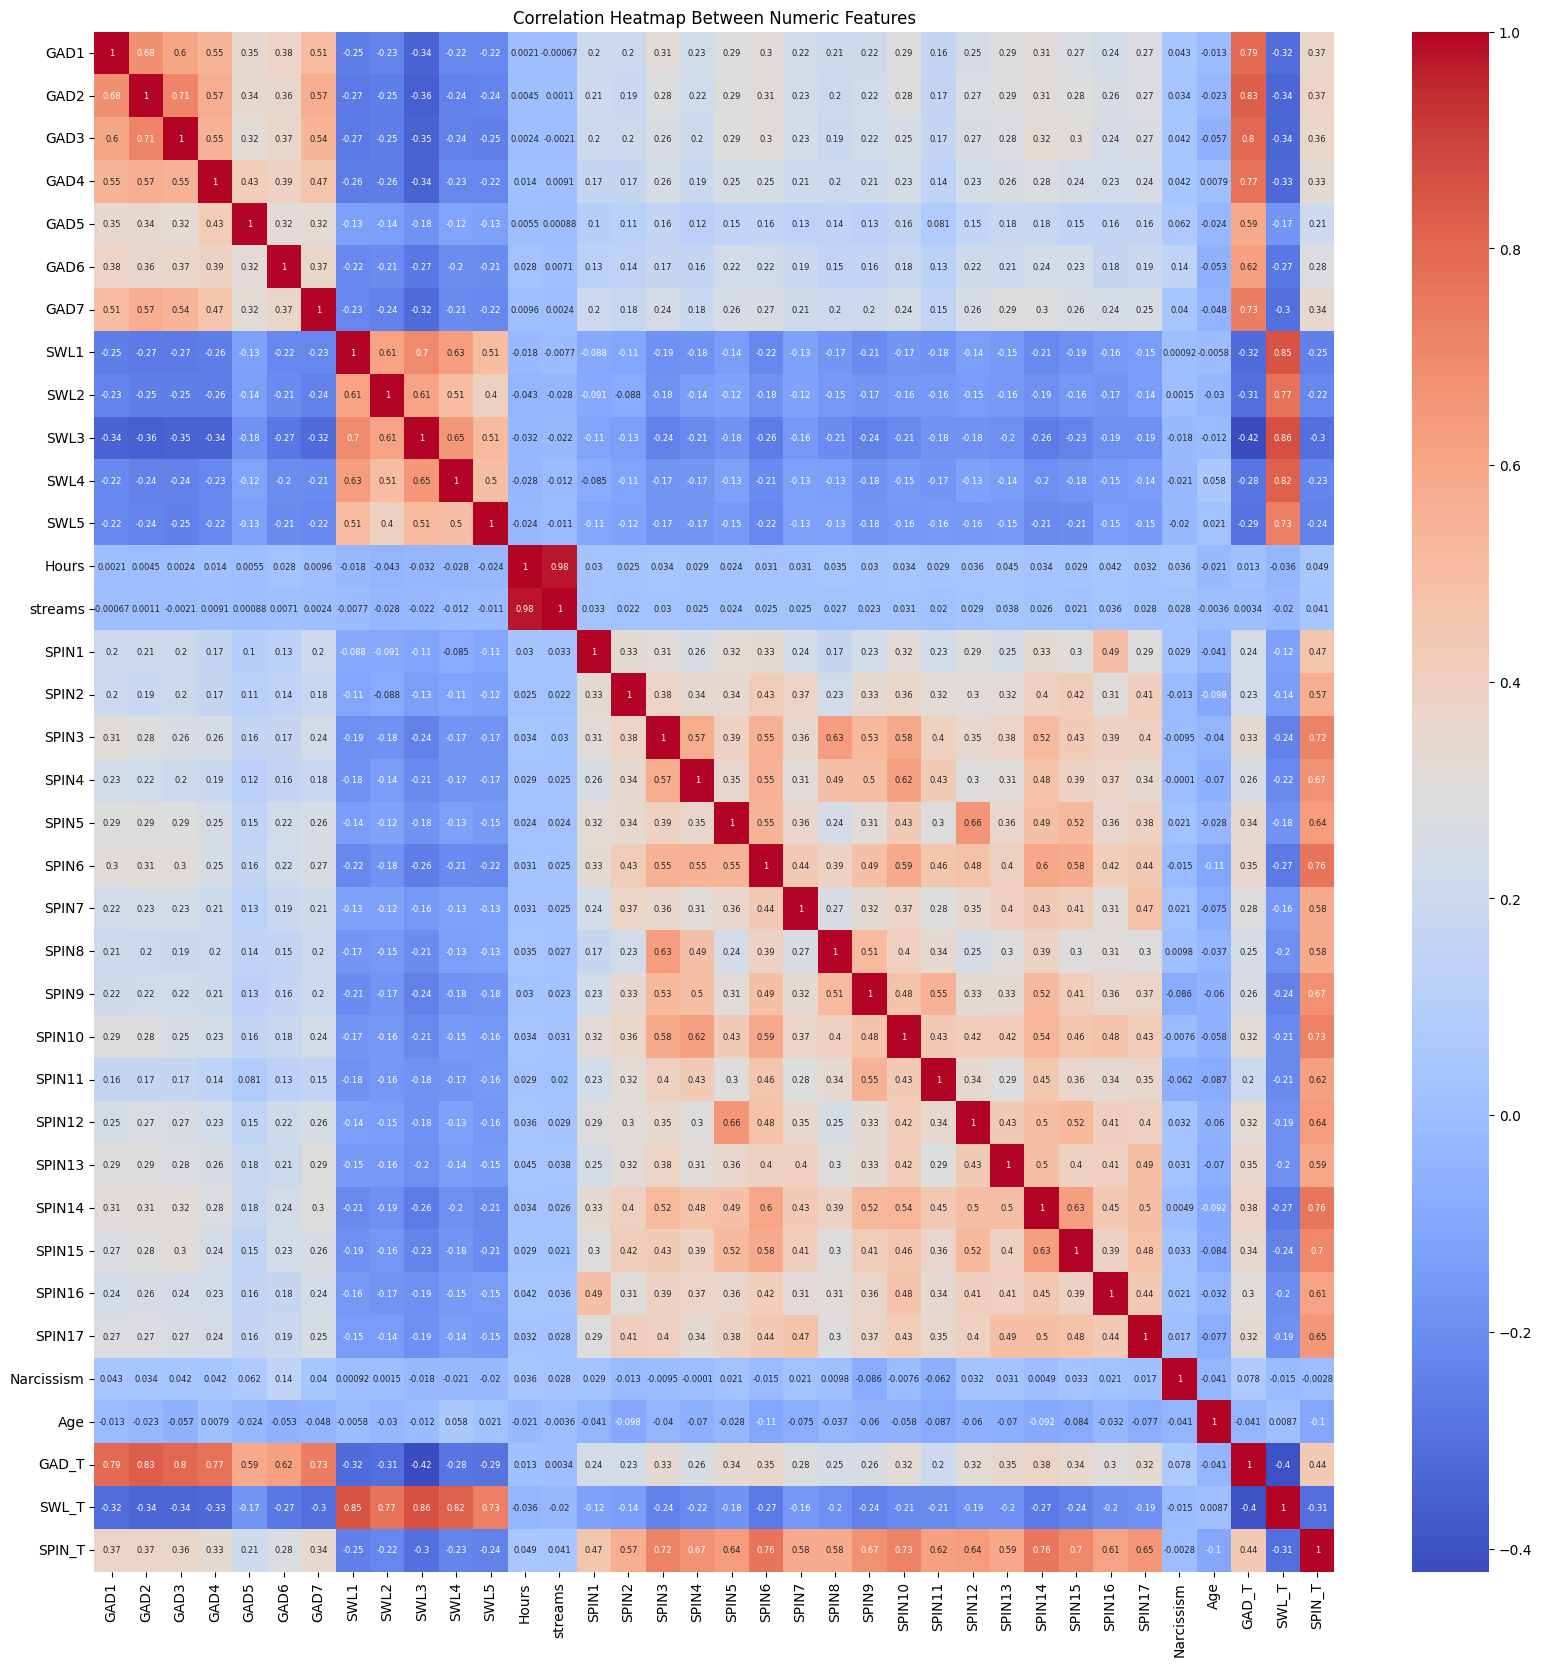

In [171]:
# Correlations
plt.figure(figsize=(20,20))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, annot_kws={'size': 6}, cmap='coolwarm')
plt.title("Correlation Heatmap Between Numeric Features")
plt.show()


Originally, the aim of this model was to predict the Narcissism variable of the data given other independent variables. However, the heatmap above shows that the Narcissism variable is barely influenced by any of the other variables in the dataset. Because of this, we have decided to analyze the GAD_T variable as a function of the SPIN survey questions. The reasoning for this is two-fold: besides the individual GAD questions from its survey, the SPIN variables had the greatest correlation to the GAD_T variable. The second reason is that there are a multitude of SPIN variables, which means that there are more inputs for the model to take into consideration before giving its output. 

# Feature Engineering

In [172]:
data = data[["SPIN1", "SPIN2", "SPIN3", "SPIN4", "SPIN5", "SPIN6", "SPIN7", "SPIN8", "SPIN9", "SPIN10", 
             "SPIN11", "SPIN12", "SPIN13", "SPIN14", "SPIN15", "SPIN16", "SPIN17", "GAD_T"]]

def categorize_gad_t(value):
    if value <= 7:
        return "low"
    elif value <= 14:
        return "medium"
    else:
        return "high"

# Apply the categorization function to GAD_T column
data['GAD_T_Category'] = data['GAD_T'].apply(categorize_gad_t)

# Perform one-hot encoding
data = pd.get_dummies(data, columns=['GAD_T_Category'], prefix='GAD_T')

# Display the modified data
display(data.head(10))


,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,GAD_T,GAD_T_high,GAD_T_low,GAD_T_medium
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,False,True,False
1,2.0,1.0,1.0,3.0,2.0,3.0,1.0,3.0,4.0,0.0,3.0,0.0,1.0,3.0,3.0,1.0,2.0,8,False,False,True
2,1.0,0.0,1.0,2.0,3.0,4.0,2.0,1.0,0.0,1.0,1.0,3.0,0.0,2.0,4.0,4.0,2.0,8,False,False,True
3,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0,False,True,False
4,2.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,14,False,False,True
5,1.0,1.0,2.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,False,True,False
6,1.0,2.0,2.0,3.0,1.0,1.0,1.0,2.0,3.0,1.0,3.0,1.0,0.0,1.0,2.0,1.0,1.0,0,False,True,False
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True,False
8,1.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,2.0,4.0,4.0,2.0,3.0,12,False,False,True
9,1.0,1.0,1.0,1.0,3.0,3.0,0.0,1.0,2.0,2.0,3.0,1.0,0.0,3.0,2.0,0.0,2.0,10,False,False,True


The goal of the models below is to classify the participant as having a high GAD total score, medium total GAD total score, and low GAD total score. To do this, the GAD_T variable was split into 3 separate columns and assigned a column based on what the GAD_T score was. Values of 7 and below were considered low, 8 to 14 inclusive were considered medium and 15 to 21 inclusive were considered high.

In [175]:
# Activation functions
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return np.where(x >= 0, 
                    1 / (1 + np.exp(-x)), 
                    np.exp(x) / (1 + np.exp(x)))

def sigmoid_derivative(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

In [176]:
class MLP:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.weights = []
        self.biases = []
        
        layer_sizes = [input_size] + hidden_sizes + [output_size]
        for i in range(len(layer_sizes) - 1):
            # Xavier initialization for weights
            limit = np.sqrt(6 / (layer_sizes[i] + layer_sizes[i + 1]))
            self.weights.append(np.random.uniform(-limit, limit, (layer_sizes[i], layer_sizes[i + 1])).astype(np.float64))
            self.biases.append(np.zeros((1, layer_sizes[i + 1]), dtype=np.float64))

    def forward(self, X, train=True):
        self.activations = []
        self.z_values = []
        activation = X
        
        for i in range(len(self.weights) - 1):
            z = np.dot(activation, self.weights[i]) + self.biases[i]
            self.z_values.append(z)
            activation = relu(z)  # Apply ReLU activation
            self.activations.append(activation)
        
        # Output layer with softmax activation
        z = np.dot(activation, self.weights[-1]) + self.biases[-1]
        self.z_values.append(z)
        activation = self.softmax(z)
        self.activations.append(activation)
        
        return activation

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # For numerical stability
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def backward(self, X, y, learning_rate):
        m = y.shape[0]
        
        # Convert y to one-hot encoding
        y_one_hot = np.zeros((m, self.weights[-1].shape[1]))
        y_one_hot[np.arange(m), y] = 1

        output_error = self.activations[-1] - y_one_hot
        output_grad = output_error / m
        
        for i in reversed(range(len(self.weights))):
            if i > 0:
                activation_grad = relu_derivative(self.z_values[i - 1])
                delta = np.dot(output_grad, self.weights[i].T) * activation_grad
            else:
                delta = np.dot(output_grad, self.weights[i].T)
            
            self.weights[i] -= learning_rate * np.dot(self.activations[i - 1].T if i > 0 else X.T, output_grad)
            self.biases[i] -= learning_rate * np.sum(output_grad, axis=0, keepdims=True)
            
            output_grad = delta

    def predict(self, X):
        probabilities = self.forward(X, train=False)
        return np.argmax(probabilities, axis=1)  # Class with highest probability
    


In [177]:
def create_confusion_matrix(y_true, y_pred, M):
    """
    Creates an MxM confusion matrix for M classes.
    
    :param y_true: true class labels
    :param y_pred: predicted class labels
    :return: confusion matrix of size MxM
    """
    confusion_mat = np.zeros((M, M), dtype=int) # initialize confusion matrix MxM
    for true, predicted in zip(y_true, y_pred): # true labels as rows, predicted labels as columns
        confusion_mat[true, predicted] += 1
    return confusion_mat

def compute_metrics_from_confusion_matrix(confusion_mat):
    """
    Computes metrics (precision, recall, f1 score, support) from confusion matrix.
    
    :param confusion_mat: the confusion matrix
    :return: the computed metrics
    """
    # M classes
    M = confusion_mat.shape[0]
    metrics = []
    
    # Loop through each class
    for j in range(M):
        TP = confusion_mat[j,j] # TP = number of positive labels correctly predicted
        FP = confusion_mat[:,j].sum() - TP # FP = number of negative labels incorrectly predicted as positive
        FN = confusion_mat[j,:].sum() - TP # FN = number of positive labels incorrectly predicted as negative
        TN = confusion_mat.sum() - (TP + FP + FN) # TN = number of negative labels correctly predicted
        
        if (TP + FP) > 0: # avoid divide by 0
            precision = TP / (TP + FP)
        else:
            precision = 0.0
            
        if (TP + FN) > 0: # avoid divide by 0
            recall = TP / (TP + FN)
        else:
            recall = 0.0
        
        if ((1 / precision) + (1 / recall)) > 0: # avoid divide by 0
            f1_score = 2 / ((1 / precision) + (1 / recall))
        else:
            f1_score = 0.0
            
        support = confusion_mat[j,:].sum() # support = number of actual occurences of the class in the dataset
        
        metrics.append({'precision': precision, 'recall': recall, 'f1_score': f1_score, 'support': support})
    return metrics

def compute_macro_and_weighted_averages_of_metrics(metrics):
    """
    Computes the macro and weighted averages of the passed in metrics.
    
    :param metrics: the metrics (precision, recall, f1_score, support)
    :return: the macro and weighted averages of the metrics
    """    
    # M classes
    M = len(metrics)
    
    # Compute the weighted metric averages
    weighted_avg_precision = np.average([metric['precision'] for metric in metrics], weights=[metric['support'] for metric in metrics])
    weighted_avg_recall = np.average([metric['recall'] for metric in metrics], weights=[metric['support'] for metric in metrics])
    weighted_avg_f1 = np.average([metric['f1_score'] for metric in metrics], weights=[metric['support'] for metric in metrics])
    
    # Compute the macro metric averages
    macro_avg_precision = np.mean([metric['precision'] for metric in metrics])
    macro_avg_recall = np.mean([metric['recall'] for metric in metrics])
    macro_avg_f1 = np.mean([metric['f1_score'] for metric in metrics])
    
    return {
        'weighted_avg_precision': weighted_avg_precision,
        'weighted_avg_recall': weighted_avg_recall,
        'weighted_avg_f1': weighted_avg_f1,
        'macro_avg_precision': macro_avg_precision,
        'macro_avg_recall': macro_avg_recall,
        'macro_avg_f1': macro_avg_f1
    }
    
def plot_confusion_matrix(confusion_mat, classes, title):
    """
    Plots a heatmap version of confusion matrix for visual analysis.
    
    :param confusion_mat: the confusion matrix
    :param classes: the name of the classes
    :param title: title for the plot
    """
    plt.figure(figsize=(8,6))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
def plot_classification_metrics(metrics_classifier1, metrics_classifier2, models, classes, title):
    """
    Plots a comparison of the various metrics between two classifiers.
    
    :param metrics_classifier1: metrics of the first classifier
    :param metrics_classifier2: metrics of the second classifier
    :param models: names of the models
    :param title: the title of the plot
    :param classes: names of the classes
    """    
    # Convert the metrics to Dataframes
    df_classifier1 = pd.DataFrame(metrics_classifier1, index=classes)
    df_classifier2 = pd.DataFrame(metrics_classifier2, index=classes)
    
    # Concatenate the metrics from both classifiers together to allow comparisons
    combined_metrics = pd.concat([df_classifier1, df_classifier2], keys=models, axis=1)
        
    # Display a heatmap of the metrics side by side
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.heatmap(combined_metrics.iloc[:,:], annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, ax=ax)
    plt.title(title)
    plt.xlabel('Metrics')
    plt.ylabel('Sentiment')
    plt.show()
    
def plot_avg_metrics(avg_metrics_classifier1, avg_metrics_classifier2, name_classifier1, name_classifier2):
    """
    Plots the macro and weighted averages of the metrics of two classifiers.
    
    :param avg_metrics_classifier1: average metrics for the first classifier
    :param avg_metrics_classifier2: average metrics for the second classifier
    :param name_classifier1: name of the first classifier
    :param name_classifier2: name of the second classifier
    """
    # Get the name and values of the metrics for each classifier
    metrics = list(avg_metrics_classifier1.keys())
    classifier1_metrics = list(avg_metrics_classifier1.values())
    classifier2_metrics = list(avg_metrics_classifier2.values())
    
    # Bar positions
    x = np.arange(len(metrics))
    width = 0.35 # width of each bar
    
    # Plot the side by side average metrics between the two classifiers
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x - width / 2, classifier1_metrics, width, label=name_classifier1, color='skyblue')
    ax.bar(x + width / 2, classifier2_metrics, width, label=name_classifier2, color='salmon')
    
    # Labels, title, etc.
    ax.set_xticks(x)
    ax.set_xticklabels(metrics, rotation=45, ha='right')
    ax.set_xlabel('Metric')
    ax.set_ylabel('Metric Value')
    ax.set_title('Comparison of Average Metrics between Multi Layer Perceptron and Support Vector Machine')
    ax.legend()
    
    # Show plot
    plt.tight_layout()
    plt.show()

from sklearn.metrics import f1_score

def tune_hidden_layers(X, y, hidden_layer_configs, epochs=300, learning_rate=0.001, k_folds=5):
    """
    Tune hidden layer configurations using k-fold cross-validation, selecting the configuration 
    that gives the highest average F1 score.

    Args:
        X: Features for training.
        y: Labels for training.
        hidden_layer_configs: List of hidden layer configurations to test (e.g., [[128, 64], [256, 128, 64]]).
        epochs: Number of epochs to train for.
        learning_rate: Learning rate for optimization.
        k_folds: Number of folds for cross-validation.

    Returns:
        Best configuration and its F1 score.
    """
    best_config = None
    best_f1_score = 0

    for config in hidden_layer_configs:
        print(f"Testing hidden layer configuration: {config}")
        avg_f1_score = k_fold_cross_validation(k_folds, X, y, hidden_sizes=config, epochs=epochs, learning_rate=learning_rate)
        print(f"Configuration {config}, Average F1 Score: {avg_f1_score:.4f}")

        if avg_f1_score > best_f1_score:
            best_f1_score = avg_f1_score
            best_config = config

    return best_config, best_f1_score

def k_fold_cross_validation(k_folds, X, y, hidden_sizes, epochs, learning_rate):
    # Split data into k folds
    fold_size = len(X) // k_folds
    f1_scores = []

    for fold in range(k_folds):
        
        # Create the validation and training sets for the current fold
        val_start = fold * fold_size
        val_end = (fold + 1) * fold_size
        X_train, X_val = np.concatenate([X[:val_start], X[val_end:]]), X[val_start:val_end]
        y_train, y_val = np.concatenate([y[:val_start], y[val_end:]]), y[val_start:val_end]

        # Train the model
        model = MLP(X_train.shape[1], hidden_sizes, output_size=3)  # Adjust output_size for your case
        for epoch in range(epochs):
            # Train the model with the current fold's training data
            y_train_int = np.argmax(y_train, axis=1) if len(y_train.shape) > 1 else y_train
            predictions = model.forward(X_train)
            loss = -np.mean(np.log(predictions[np.arange(y_train_int.shape[0]), y_train_int]))  # Cross-entropy loss
            model.backward(X_train, y_train_int, learning_rate)

        # Evaluate the model
        y_val_pred = model.predict(X_val)
        y_val_int = np.argmax(y_val, axis=1) if len(y_val.shape) > 1 else y_val
        fold_f1_score = f1_score(y_val_int, y_val_pred, average='weighted')  # Compute weighted F1 score
        f1_scores.append(fold_f1_score)

    # Return the average F1 score over all folds
    return np.mean(f1_scores)


Testing hidden layer configuration: [16]
Configuration [16], Average F1 Score: 0.5592
Testing hidden layer configuration: [32]
Configuration [32], Average F1 Score: 0.6560
Testing hidden layer configuration: [64]
Configuration [64], Average F1 Score: 0.6367
Testing hidden layer configuration: [128]
Configuration [128], Average F1 Score: 0.6632
Testing hidden layer configuration: [256]
Configuration [256], Average F1 Score: 0.6584
Testing hidden layer configuration: [128, 32]
Configuration [128, 32], Average F1 Score: 0.6596
Testing hidden layer configuration: [128, 64]
Configuration [128, 64], Average F1 Score: 0.6464
Testing hidden layer configuration: [256, 128]
Configuration [256, 128], Average F1 Score: 0.6468
Testing hidden layer configuration: [256, 128, 64]
Configuration [256, 128, 64], Average F1 Score: 0.6393
Testing hidden layer configuration: [512, 256, 128]
Configuration [512, 256, 128], Average F1 Score: 0.6369
Best Configuration: [128], Accuracy: 0.6632
Test Accuracy with

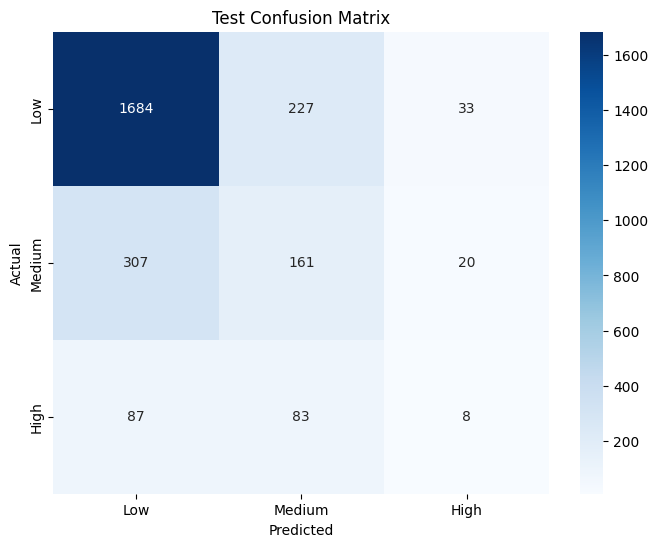

In [178]:
# Split the data into train and test first
np.random.seed(42)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

train_size = int(0.8 * data.shape[0])
train_idx, test_idx = indices[:train_size], indices[train_size:]

train_data = data.iloc[train_idx]
test_data = data.iloc[test_idx]

# Extract features and target for train and test sets
X_train = train_data.drop(['GAD_T', 'GAD_T_high', 'GAD_T_low', 'GAD_T_medium'], axis=1).to_numpy(dtype=np.float64)
y_train = train_data[['GAD_T_low', 'GAD_T_medium', 'GAD_T_high']].to_numpy(dtype=np.float64)

X_test = test_data.drop(['GAD_T', 'GAD_T_high', 'GAD_T_low', 'GAD_T_medium'], axis=1).to_numpy(dtype=np.float64)
y_test = test_data[['GAD_T_low', 'GAD_T_medium', 'GAD_T_high']].to_numpy(dtype=np.float64)

# Normalize data (using training mean and std for consistency)
X_mean, X_std = X_train.mean(axis=0), X_train.std(axis=0)
X_std[X_std == 0] = 1  # Avoid division by zero
X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

# Update MLP class initialization
input_size = X_train.shape[1]
output_size = 3  # 3 output neurons for the 3 categories (low, medium, high)


# Compute mean and std from the training set only
X_mean, X_std = X_train.mean(axis=0), X_train.std(axis=0)

# Handle zero standard deviation
X_std[X_std == 0] = 1  # Replace std=0 with 1 to prevent division by zero

# Normalize training data
X_train = (X_train - X_mean) / X_std

# Normalize test data using training mean and std
X_test = (X_test - X_mean) / X_std

# Train the model
input_size = X_train.shape[1]
hidden_sizes = [128, 40, 20]  # Increased neurons and layers for more capacity
output_size = 5  # 5 output neurons for classification

mlp = MLP(input_size, hidden_sizes, output_size)  # Add dropout

epochs = 300  # Train for more epochs
learning_rate = 0.001  # Lower learning rate for better convergence

hidden_layer_configs = [
    [16],
    [32],
    [64],
    [128],
    [256],
    [128, 32],
    [128, 64],
    [256, 128],
    [256, 128, 64],
    [512, 256, 128]
]

# Perform hyperparameter tuning
best_config, best_accuracy = tune_hidden_layers(X_train, y_train, hidden_layer_configs, k_folds=5)

print(f"Best Configuration: {best_config}, Accuracy: {best_accuracy:.4f}")

# Train final model with the best configuration
mlp = MLP(input_size=X_train.shape[1], hidden_sizes=best_config, output_size=3)
for epoch in range(epochs):
    # Convert one-hot encoded labels to integer labels if necessary
    y_train_int = np.argmax(y_train, axis=1) if len(y_train.shape) > 1 else y_train
    predictions = mlp.forward(X_train)
    loss = -np.mean(np.log(predictions[np.arange(y_train_int.shape[0]), y_train_int]))  # Cross-entropy loss
    mlp.backward(X_train, y_train_int, learning_rate)


# Evaluate on the test set
y_pred = mlp.predict(X_test)
y_test_int = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to integer labels
test_accuracy = np.mean(y_pred == y_test_int)

# Evaluate on the test set
y_test_int = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to integer labels
y_pred_int = y_pred.astype(int) if y_pred.dtype != int else y_pred  # Ensure predictions are integers

# Compute and print the confusion matrix for the test set
conf_matrix1 = create_confusion_matrix(y_test_int, y_pred_int, 3)
print(f"Test Accuracy with Best Configuration: {test_accuracy:.4f}")
print("Confusion Matrix:")
for row in conf_matrix1:
    print(" ".join(f"{x:5d}" for x in row))
metrics1 = compute_metrics_from_confusion_matrix(conf_matrix1)
avg_metrics1 = compute_macro_and_weighted_averages_of_metrics(metrics1)

plot_confusion_matrix(conf_matrix1, classes=['Low', 'Medium', 'High'], title="Test Confusion Matrix")



Testing SVM with C=0.1, gamma=scale
C=0.1, gamma=scale, Average F1 Score: 0.3274
Testing SVM with C=0.1, gamma=0.1
C=0.1, gamma=0.1, Average F1 Score: 0.3167
Testing SVM with C=0.1, gamma=0.01
C=0.1, gamma=0.01, Average F1 Score: 0.2854
Testing SVM with C=1, gamma=scale
C=1, gamma=scale, Average F1 Score: 0.3780
Testing SVM with C=1, gamma=0.1
C=1, gamma=0.1, Average F1 Score: 0.3868
Testing SVM with C=1, gamma=0.01
C=1, gamma=0.01, Average F1 Score: 0.3277
Testing SVM with C=10, gamma=scale
C=10, gamma=scale, Average F1 Score: 0.4179
Testing SVM with C=10, gamma=0.1
C=10, gamma=0.1, Average F1 Score: 0.4249
Testing SVM with C=10, gamma=0.01
C=10, gamma=0.01, Average F1 Score: 0.3642
Best Parameters: C=10, gamma=0.1, F1 Score: 0.4249
Test F1 Score with Best Parameters: 0.4210
Confusion Matrix:


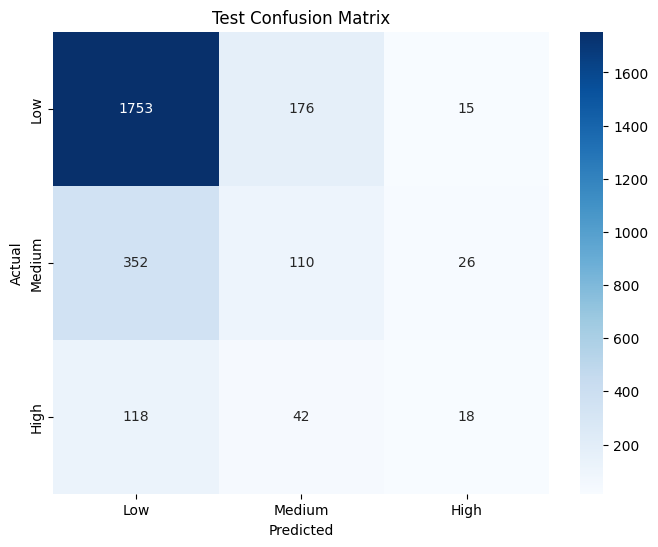

In [179]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

def k_fold_cross_validation_svm(k_folds, X, y, C, gamma, scoring='f1_macro'):
    """
    Perform k-fold cross-validation for SVM with specified hyperparameters.

    Args:
        k_folds: Number of folds for cross-validation.
        X: Feature data.
        y: Target labels (one-hot encoded).
        C: SVM regularization parameter.
        gamma: Kernel coefficient.
        scoring: Scoring metric for cross-validation ('f1_macro' or 'f1_weighted').

    Returns:
        The average F1 score across all folds.
    """
    # Convert one-hot encoded labels to integer labels (e.g., [0, 1, 2])
    y_int = np.argmax(y, axis=1)  # Convert to 1D integer array

    # Cross-validation
    svm = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
    f1_scores = cross_val_score(svm, X, y_int, cv=k_folds, scoring=scoring)
    return f1_scores.mean()

def tune_svm_hyperparameters(X, y, C_values, gamma_values, k_folds=5):
    best_params = None
    best_f1_score = 0

    for C in C_values:
        for gamma in gamma_values:
            print(f"Testing SVM with C={C}, gamma={gamma}")
            f1_score = k_fold_cross_validation_svm(k_folds, X, y, C=C, gamma=gamma, scoring='f1_macro')
            print(f"C={C}, gamma={gamma}, Average F1 Score: {f1_score:.4f}")

            if f1_score > best_f1_score:
                best_f1_score = f1_score
                best_params = (C, gamma)

    return best_params, best_f1_score

# Define hyperparameter grid
C_values = [0.1, 1, 10]
gamma_values = ['scale', 0.1, 0.01]

# Perform hyperparameter tuning
best_params, best_f1_score = tune_svm_hyperparameters(X_train, y_train, C_values, gamma_values)

print(f"Best Parameters: C={best_params[0]}, gamma={best_params[1]}, F1 Score: {best_f1_score:.4f}")

# Train final SVM model with the best parameters
final_svm = SVC(kernel='rbf', C=best_params[0], gamma=best_params[1], random_state=42)
final_svm.fit(X_train, np.argmax(y_train, axis=1))  # Convert to integer labels for training

# Evaluate on the test set
y_pred = final_svm.predict(X_test)
test_f1_score = f1_score(np.argmax(y_test, axis=1), y_pred, average='macro')  # Compute F1 score on test set

# Compute and print the confusion matrix
conf_matrix2 = confusion_matrix(np.argmax(y_test, axis=1), y_pred)  # Convert test labels to integer labels
print(f"Test F1 Score with Best Parameters: {test_f1_score:.4f}")
print("Confusion Matrix:")
metrics2 = compute_metrics_from_confusion_matrix(conf_matrix2)
avg_metrics2 = compute_macro_and_weighted_averages_of_metrics(metrics2)

plot_confusion_matrix(conf_matrix2, classes=['Low', 'Medium', 'High'], title="Test Confusion Matrix")



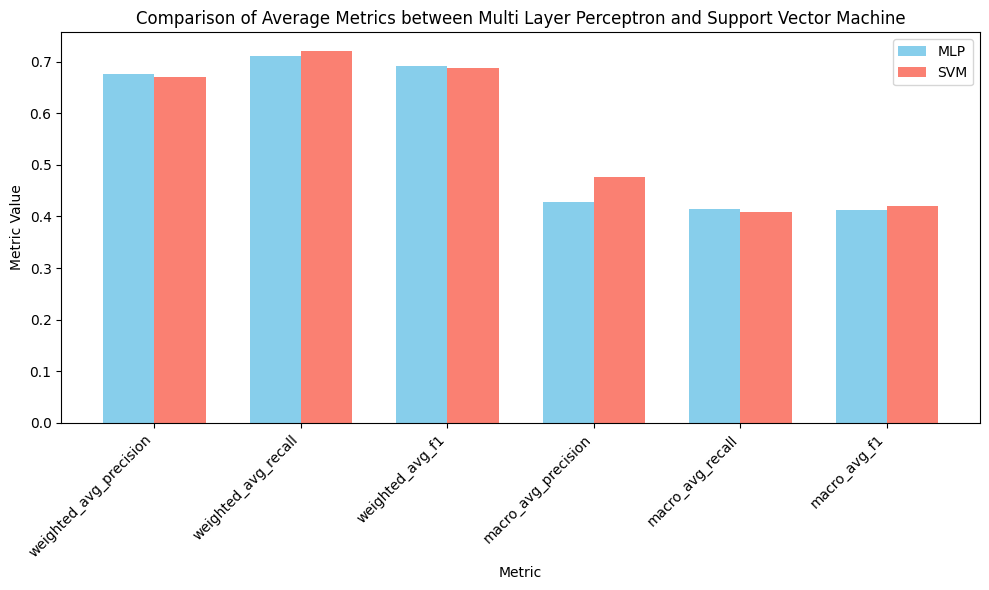

In [180]:
plot_avg_metrics(avg_metrics_classifier1=avg_metrics1, avg_metrics_classifier2=avg_metrics2, 
                 name_classifier1="MLP", name_classifier2="SVM")